# Telco Classification Project

In [280]:
import numpy as np
import pandas as pd
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)


## I. Data Acquisition

In [281]:
# get telco data
df0 = acquire.get_telco_data()


In [282]:
# view first few rows
df0.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## II. Data Cleaning & Preparation

In [283]:
df = prepare.prep_telco(df0)
df

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0,9,65.60,593.30,0,1,1,...,1,0,0,1,0,0,0,0,0,1
1,2,1,1,0,9,59.90,542.40,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,2,1,0,4,73.90,280.85,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,2,1,1,13,98.00,1237.85,1,1,0,...,1,0,1,0,0,1,0,0,1,0
4,2,2,1,1,3,83.90,267.40,0,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,0,13,55.15,742.90,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,1,2,1,0,22,85.10,1873.70,1,1,0,...,0,0,1,0,0,1,0,0,1,0
7040,2,1,1,0,2,50.30,92.75,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,2,1,3,0,67,67.85,4627.65,1,1,1,...,0,0,1,0,1,0,0,0,0,1


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        7043 non-null   int64  
 1   internet_service_type_id               7043 non-null   int64  
 2   contract_type_id                       7043 non-null   int64  
 3   senior_citizen                         7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   monthly_charges                        7043 non-null   float64
 6   total_charges                          7043 non-null   float64
 7   gender_encoded                         7043 non-null   int64  
 8   partner_encoded                        7043 non-null   int64  
 9   dependents_encoded                     7043 non-null   int64  
 10  phone_service_encoded                  7043 non-null   int64  
 11  pape

In [285]:
telco_train, telco_validate, telco_test = prepare.my_train_test_split(df,"churn_encoded")
print(telco_train.shape, telco_validate.shape, telco_test.shape)
print(telco_train.describe().T)


(4225, 34) (1409, 34) (1409, 34)
                                        count         mean          std  \
payment_type_id                        4225.0     2.319053     1.151612   
internet_service_type_id               4225.0     1.875976     0.738711   
contract_type_id                       4225.0     1.687101     0.828349   
senior_citizen                         4225.0     0.161893     0.368397   
tenure                                 4225.0    32.500828    24.532563   
monthly_charges                        4225.0    65.056142    30.268493   
total_charges                          4225.0  2298.513598  2271.603284   
gender_encoded                         4225.0     0.508639     0.499985   
partner_encoded                        4225.0     0.488521     0.499927   
dependents_encoded                     4225.0     0.306272     0.460999   
phone_service_encoded                  4225.0     0.906982     0.290492   
paperless_billing_encoded              4225.0     0.593846     0.49

In [286]:
telco_train.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,2.319053,1.875976,1.687101,0.161893,32.500828,65.056142,2298.513598,0.508639,0.488521,0.306272,...,0.392189,0.218462,0.395503,0.216095,0.235503,0.439053,0.218462,0.217515,0.336805,0.224852
std,1.151612,0.738711,0.828349,0.368397,24.532563,30.268493,2271.603284,0.499985,0.499927,0.460999,...,0.488296,0.413251,0.489016,0.411628,0.424363,0.496330,0.413251,0.412604,0.472673,0.417534
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.650000,411.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.400000,1401.150000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,90.150000,3865.450000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
telco_train.columns, telco_validate.columns


(Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
        'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
        'gender_encoded', 'partner_encoded', 'dependents_encoded',
        'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
        'multiple_lines_No phone service', 'multiple_lines_Yes',
        'online_security_No internet service', 'online_security_Yes',
        'online_backup_No internet service', 'online_backup_Yes',
        'device_protection_No internet service', 'device_protection_Yes',
        'tech_support_No internet service', 'tech_support_Yes',
        'streaming_tv_No internet service', 'streaming_tv_Yes',
        'streaming_movies_No internet service', 'streaming_movies_Yes',
        'contract_type_One year', 'contract_type_Two year',
        'internet_service_type_Fiber optic', 'internet_service_type_None',
        'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
        'payment

### Establish a Baseline

In [288]:
# x and y train
X_telco_train = telco_train.drop(columns = 'churn_encoded')
y_telco_train = telco_train.churn_encoded

# x and y validate
X_telco_validate = telco_validate.drop(columns = 'churn_encoded')
y_telco_validate = telco_validate.churn_encoded

# x and y test
X_telco_test = telco_test.drop(columns = 'churn_encoded')
y_telco_test = telco_test.churn_encoded

In [289]:
telco_baseline = (y_telco_train == 0).mean()
print('The churn baseline is:', telco_baseline)

The churn baseline is: 0.7346745562130178


- The baseline model is the mode of target varible that did not churn.
- Our baseline model will always be predicting that a customer does not churn at an accuracy level of 73%.

## III. Model Data & Evaluation
- We'll look at three models utilizing various different features in columns.
- The models are:
- I. Decision Tree
- II. Random Forest
- III. KNearestNeighborsclassifier(KNN)


### Using Different Features
### Split the data

In [290]:
# X is indepedent variables
# y is target variable

#features
columns = ['internet_service_type_Fiber optic', 'internet_service_type_None', 'tenure', 'monthly_charges']

# x and y train
X_telco_train = telco_train.drop(columns = 'churn_encoded')
y_telco_train = telco_train.churn_encoded

# x and y validate
X_telco_validate = telco_validate.drop(columns = 'churn_encoded')
y_telco_validate = telco_validate.churn_encoded

# x and y test
X_telco_test = telco_test.drop(columns = 'churn_encoded')
y_telco_test = telco_test.churn_encoded

In [291]:
# y_train data (target variable)
y_telco_train.value_counts()

0    3104
1    1121
Name: churn_encoded, dtype: int64

In [292]:
X_telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   payment_type_id                        4225 non-null   int64  
 1   internet_service_type_id               4225 non-null   int64  
 2   contract_type_id                       4225 non-null   int64  
 3   senior_citizen                         4225 non-null   int64  
 4   tenure                                 4225 non-null   int64  
 5   monthly_charges                        4225 non-null   float64
 6   total_charges                          4225 non-null   float64
 7   gender_encoded                         4225 non-null   int64  
 8   partner_encoded                        4225 non-null   int64  
 9   dependents_encoded                     4225 non-null   int64  
 10  phone_service_encoded                  4225 non-null   int64  
 11  p

### (I) Using Decision Tree

###  I made predictions on the training sample to fit decision tree classifier using decion tree model

In [293]:
# make the thing
model1 = DecisionTreeClassifier(max_depth = 1, random_state = 123)
# fit the thing
model1.fit(X_telco_train, y_telco_train)
# use the thing
print(f'training score: {model1.score(X_telco_train, y_telco_train):.2%}')
print(f'validate score: {model1.score(X_telco_validate, y_telco_validate):.2%}')

training score: 73.47%
validate score: 73.46%


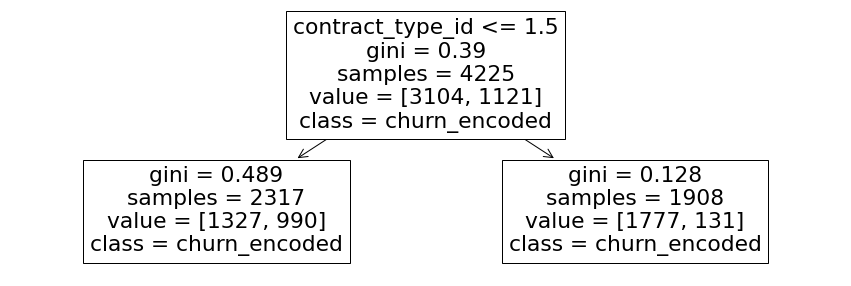

In [294]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plot_tree(model1, feature_names=X_telco_train.columns.to_list(), class_names=['churn_encoded']);

In [295]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=1, random_state=123)


In [296]:
# model1.fit(X, y)

clf = clf.fit(X_telco_train, y_telco_train)


In [297]:
# make prediction on train obeservations

y_telco_pred = clf.predict(X_telco_train)
y_telco_pred[0:5]


array([0, 0, 0, 0, 0])

### I did evaluate my in-sample results using the model score and came up with a classification report as well as a confusion matrix.

In [298]:
#model1 score
model1.score(X_telco_validate,y_telco_validate)

0.7345635202271115

In [299]:
#classification report
print(classification_report(y_telco_train, y_telco_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



In [300]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred)


array([[3104,    0],
       [1121,    0]])

In [301]:
y_telco_train.value_counts()


0    3104
1    1121
Name: churn_encoded, dtype: int64

In [302]:
import pandas as pd

labels = sorted(y_telco_train.unique())

df1_confused = pd.DataFrame(sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred), index=labels, columns=labels)
df1_confused


,0,1
0,3104,0
1,1121,0


### I used a different max_depth value to compare the results.

In [303]:
#model2
# make the thing
model2 = DecisionTreeClassifier(max_depth=3)
# fit the thing
model2.fit(X_telco_train, y_telco_train)
# use the thing
print(f'training score: {model2.score(X_telco_train, y_telco_train):.2%}')
print(f'validate score: {model2.score(X_telco_validate, y_telco_validate):.2%}')

training score: 78.79%
validate score: 79.28%


In [304]:
# model2.fit(X, y)

clf = clf.fit(X_telco_train, y_telco_train)


In [305]:
print(classification_report(y_telco_train, y_telco_pred))


              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225



In [306]:
#model2 score
model2.score(X_telco_validate,y_telco_validate)

0.7927608232789212

In [307]:
# confusion matrix

sklearn.metrics.confusion_matrix(y_telco_train, y_telco_pred)


array([[3104,    0],
       [1121,    0]])

### Model1 performs better at an accuracy score of 73% on my in-sample data with an established baseline percentage of 73.

In [308]:
model1.score(X_telco_validate, y_telco_validate), model2.score(X_telco_validate, y_telco_validate)

(0.7345635202271115, 0.7927608232789212)

### Using Different Features

In [309]:
# Split the data
# X is indepedent variables
# y is target variable

#features
columns = ['payment_type_Credit card (automatic)',
    'payment_type_Electronic check',
    'payment_type_Mailed check',
    'contract_type_One year',
    'contract_type_Two year',
    'tenure']

# x and y train
X_telco_train = telco_train.drop(columns = 'churn_encoded')
y_telco_train = telco_train.churn_encoded

# x and y validate
X_telco_validate = telco_validate.drop(columns = 'churn_encoded')
y_telco_validate = telco_validate.churn_encoded

# x and y test
X_telco_test = telco_test.drop(columns = 'churn_encoded')
y_telco_test = telco_test.churn_encoded

In [310]:
model3 = DecisionTreeClassifier(max_depth = 9, random_state = 123)
model3.fit(X_telco_train, y_telco_train)

DecisionTreeClassifier(max_depth=9, random_state=123)

In [311]:
model3.score(X_telco_train, y_telco_train)

0.8577514792899408

In [312]:
print(classification_report(y_telco_train, model3.predict(X_telco_train)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3104
           1       0.74      0.71      0.73      1121

    accuracy                           0.86      4225
   macro avg       0.82      0.81      0.82      4225
weighted avg       0.86      0.86      0.86      4225



### I used a different max_depth value to compare the results.

In [313]:
model4 = DecisionTreeClassifier(max_depth = 12, random_state = 123)
model4.fit(X_telco_train, y_telco_train)

DecisionTreeClassifier(max_depth=12, random_state=123)

In [314]:
model4.score(X_telco_train, y_telco_train)

0.9197633136094675

In [315]:
print(classification_report(y_telco_train, model4.predict(X_telco_train)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3104
           1       0.85      0.84      0.85      1121

    accuracy                           0.92      4225
   macro avg       0.90      0.90      0.90      4225
weighted avg       0.92      0.92      0.92      4225



### Takeaways

_ With the established baseline accuracy at 73%, of all the four models, model 1 remains better performer in predicting customer churn even with out of sample data.

### (II) Using Random Forest

In [316]:
# make the thing 
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)

In [317]:
# fit the thing
rf.fit(X_telco_train, y_telco_train)

RandomForestClassifier(max_depth=10)

In [318]:
# use the thing
y_pred = rf.predict(X_telco_train)

In [319]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [320]:
#model evaluation
print(classification_report(y_telco_train, rf.predict(X_telco_train)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3104
           1       0.83      0.71      0.76      1121

    accuracy                           0.88      4225
   macro avg       0.86      0.83      0.84      4225
weighted avg       0.88      0.88      0.88      4225



In [321]:
#evaluate
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_telco_train, y_telco_train)))

Accuracy of random forest classifier on training set: 0.88


In [322]:
y_telco_pred.size

4225

In [323]:
y_telco_train.size

4225

In [324]:
#create a confusion matrix
cm = confusion_matrix(y_telco_train, y_pred)
cm

array([[2941,  163],
       [ 327,  794]])

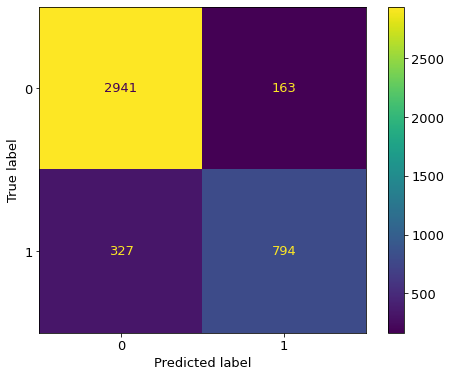

In [325]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [326]:
#classification report
pd.DataFrame(classification_report(y_telco_train,y_pred,output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.899939,0.829676,0.884024,0.864807,0.881296
recall,0.947487,0.708296,0.884024,0.827892,0.884024
f1-score,0.923101,0.764196,0.884024,0.843649,0.880940
support,3104.000000,1121.000000,0.884024,4225.000000,4225.000000


In [327]:
#create classification report
rf.score(X_telco_train, y_telco_train)

0.8840236686390532

In [328]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_telco_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(794, 2941, 163, 327)

### (III) Using KNN

In [329]:
# make the thing (default value k5)
knn1 = KNeighborsClassifier()

In [330]:
# fit the thing
knn1.fit(X_telco_train, y_telco_train)

KNeighborsClassifier()

In [331]:
# use the thing
y_pred = knn1.predict(X_telco_train)

In [332]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [333]:
#model evaluation
print(classification_report(y_telco_train, knn1.predict(X_telco_train)))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3104
           1       0.73      0.59      0.65      1121

    accuracy                           0.83      4225
   macro avg       0.80      0.76      0.77      4225
weighted avg       0.83      0.83      0.83      4225



In [334]:
#create a confusion matrix
cm = confusion_matrix(y_telco_train, y_pred)
cm

array([[2860,  244],
       [ 461,  660]])

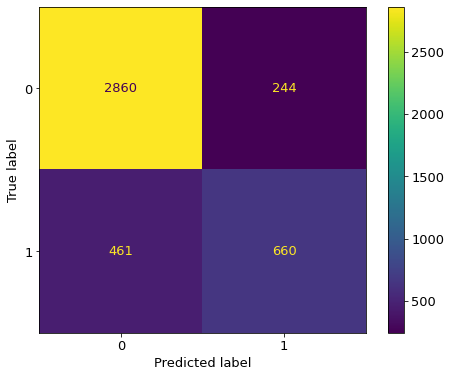

In [335]:
#create a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn1.classes_)

disp.plot()
plt.show()

In [336]:
#classification report
pd.DataFrame(classification_report(y_telco_train,y_pred,output_dict= True))

,0,1,accuracy,macro avg,weighted avg
precision,0.861186,0.730088,0.833136,0.795637,0.826403
recall,0.921392,0.588760,0.833136,0.755076,0.833136
f1-score,0.890272,0.651852,0.833136,0.771062,0.827013
support,3104.000000,1121.000000,0.833136,4225.000000,4225.000000


In [337]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_telco_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(660, 2860, 244, 461)

### Build a Model to Test Multiple Types of Models as MVPs
- Create a model.
- Fit to train.
- Score model.

In [338]:
def score_models(X_telco_train, y_telco_train, X_telco_validate, y_telco_validate):
    '''
    Score multiple models on train and validate datasets.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = dt_model1, rf_model, knn1_model.
    '''
    dt_model1 = DecisionTreeClassifier(max_depth = 1, random_state = 123)
    rf_model = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
    knn1_model = KNeighborsClassifier()
    models = [dt_model1, rf_model, knn1_model]
    for model in models:
        model.fit(X_telco_train, y_telco_train)
        actual_train = y_telco_train
        predicted_train = model.predict(X_telco_train)
        actual_validate = y_telco_validate
        predicted_validate = model.predict(X_telco_validate)
        print(model)
        print('')
        print('train score: ')
        print(classification_report(actual_train, predicted_train))
        print('validate score: ')
        print(classification_report(actual_validate, predicted_validate))
        print('________________________')
        print('')
    return dt_model1, rf_model, knn1_model


In [339]:
dt_model1, rf_model, knn1_model = score_models(X_telco_train, y_telco_train, X_telco_validate, y_telco_validate)

DecisionTreeClassifier(max_depth=1, random_state=123)

train score: 
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225

validate score: 
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409

________________________

RandomForestClassifier(max_depth=10)

train score: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3104
           1       0.83      0.71      0.76      1121

    accuracy      

## Test

In [340]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_telco_test, y_telco_test)))

Accuracy of Decision Tree classifier on test set: 0.73


In [341]:
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rf.score(X_telco_test, y_telco_test)))

Accuracy of Random Forest Classifier on test set: 0.80


In [342]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn1.score(X_telco_test, y_telco_test)))

Accuracy of KNN classifier on test set: 0.77


- When we run the test data, the accuracy for the Decision tree model1 train is maintained at 73%. Therefore, the model has no data overfit.

- When we run the test data, the accuracy for the Randon Forest dropped from 89% to 81%. Therefore, the model overfit the data.

- When we run the test data, the accuracy for the KNN model train dropped from 78% to 77%. Therefore, the model overfit the data.

- The decision tree is now selected as the final model, as it does not appear to overfit the data.


### Best Model
### As per above scores multiple models, decision tree model1 at an accuracy level of 73% performs better on my in-sample data with a baseline percentage of 73.

## Create CSV file with selected model

In [343]:
# X is indepedent variables
# y is target variable

# x and y train
X_telco_train = telco_train.drop(columns = 'churn_encoded')
y_telco_train = telco_train.churn_encoded

# x and y validate
X_telco_validate = telco_validate.drop(columns = 'churn_encoded')
y_telco_validate = telco_validate.churn_encoded

# x and y test
X_telco_test = telco_test.drop(columns = 'churn_encoded')
y_telco_test = telco_test.churn_encoded

In [344]:
# make the thing
model1 = DecisionTreeClassifier(max_depth=1)
# fit the thing
model1.fit(X_telco_train, y_telco_train)
# use the thing
print(f'training score: {model1.score(X_telco_train, y_telco_train):.2%}')
print(f'validate score: {model1.score(X_telco_validate, y_telco_validate):.2%}')
y_pred_DT_test = model1.predict(X_telco_test)
y_proba_DT_test = model1.predict_proba(X_telco_test)
X_telco_test["1_churn_encoded_proba"] = pd.DataFrame(y_proba_DT_test)[1].values
X_telco_test["prediction"] = y_pred_DT_test
X_telco_test["customer_id"] = df0.customer_id
X_telco_test = X_telco_test[X_telco_test.columns.intersection(["customer_id","prediction","1_churn_encoded_proba"])]
#df0 = df0.drop(columns = ['Unnamed:0'])
X_telco_test.to_csv("predictions.csv")

training score: 73.47%
validate score: 73.46%


In [347]:
X_telco_test

,1_churn_encoded_proba,prediction,customer_id
3160,0.068658,0,4531-AUZNK
1577,0.068658,0,2296-DKZFP
6823,0.427277,0,9692-TUSXH
3615,0.427277,0,5129-JLPIS
882,0.427277,0,1273-MTETI
...,...,...,...
1097,0.427277,0,1597-FZREH
6441,0.427277,0,9117-SHLZX
5985,0.068658,0,8441-SHIPE
2452,0.068658,0,3511-BFTJW


In [349]:
X_telco_test.to_csv("predictions.csv", index = False)

In [350]:
check = pd.read_csv("predictions.csv")
check

,1_churn_encoded_proba,prediction,customer_id
0,0.068658,0,4531-AUZNK
1,0.068658,0,2296-DKZFP
2,0.427277,0,9692-TUSXH
3,0.427277,0,5129-JLPIS
4,0.427277,0,1273-MTETI
...,...,...,...
1404,0.427277,0,1597-FZREH
1405,0.427277,0,9117-SHLZX
1406,0.068658,0,8441-SHIPE
1407,0.068658,0,3511-BFTJW


In [192]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=1, random_state=123)


In [193]:
# model1.fit(X, y)

clf = clf.fit(X_telco_train, y_telco_train)


In [194]:
# make prediction on train obeservations

y_telco_pred_proba = clf.predict(X_telco_train)
y_telco_pred_proba

array([0, 0, 0, ..., 0, 0, 0])

In [195]:
# create dataframes with the indexes
df_y_telco_pred = pd.DataFrame(y_telco_pred).set_index(X_telco_train.index)
df_y_telco_pred_proba = pd.DataFrame(y_telco_pred_proba).set_index(X_telco_train.index)
df_id = df0["customer_id"]

In [196]:
#clf, y_pred, y_pred_proba = model.clf(X_train1, y_train1)
# recreate decision tree model
#clf, y_telco_pred, y_telco_pred_proba = clf.predict(X_telco_train, y_telco_train)

## IV. Data Exploration

In [197]:
telco_train.columns, telco_validate.columns


(Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
        'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
        'gender_encoded', 'partner_encoded', 'dependents_encoded',
        'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
        'multiple_lines_No phone service', 'multiple_lines_Yes',
        'online_security_No internet service', 'online_security_Yes',
        'online_backup_No internet service', 'online_backup_Yes',
        'device_protection_No internet service', 'device_protection_Yes',
        'tech_support_No internet service', 'tech_support_Yes',
        'streaming_tv_No internet service', 'streaming_tv_Yes',
        'streaming_movies_No internet service', 'streaming_movies_Yes',
        'contract_type_One year', 'contract_type_Two year',
        'internet_service_type_Fiber optic', 'internet_service_type_None',
        'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
        'payment

### Attributes and drivers of customers churning

In [198]:
corr=telco_train.corr()
corr.sort_values(['churn_encoded'], ascending = False, inplace = True)
print(corr.churn_encoded)

churn_encoded                            1.000000
internet_service_type_Fiber optic        0.303352
payment_type_Electronic check            0.301090
monthly_charges                          0.188467
paperless_billing_encoded                0.188077
senior_citizen                           0.139013
streaming_movies_Yes                     0.063197
streaming_tv_Yes                         0.056389
multiple_lines_Yes                       0.038528
phone_service_encoded                    0.011578
gender_encoded                           0.008381
multiple_lines_No phone service         -0.011578
internet_service_type_id                -0.044251
device_protection_Yes                   -0.063436
payment_type_Mailed check               -0.080974
online_backup_Yes                       -0.090380
payment_type_Credit card (automatic)    -0.128428
tech_support_Yes                        -0.153070
partner_encoded                         -0.159401
online_security_Yes                     -0.162633


## From the above data
### Strongest drivers of customers churning 
- internet_service_type_Fiber optic        
- payment_type_Electronic check            
- monthly_charges                          
- paperless_billing_encoded                
- senior_citizen                           
- streaming_movies_Yes                     
- streaming_tv_Yes                         
- multiple_lines_Yes

### Strongest drivers of customers retention 
- payment_type_id                         
- contract_type_Two year                  
- tenure                                  
- contract_type_id  
- contract_type_One year
- total_charges

## Exploratory questions

- What is the Churn rate?
### Positive Correlation
- How does internet_service_type_id correlate to customers churn?
- How does payment type Electronic check correlate to customers churn?
- How does paperless billing encoded correlate to customers churn?
- How does senior citizen correlate to churn?
- How does streaming movies correlate to churn?
- How does streaming tv correlate to churn?
- How does multiple lines correlate to churn?
- How does gender correlate to churn?

### Negative Correlation
- How does online_security No internet service correlate to churn?
- How does customers with contract type two year correlate to churn?
- How does tenure correlate to customers churning?
- How does customers with contract type id correlate to churn?
- How does customers with contract type one year correlate to churn?
- How does total charges correlate to churn?

### Given the above questions, we can now begin to prepare and analyze data.


### 1. What is the Churn rate?

In [199]:
print(f'Churn percentage {round(telco_train.churn_encoded.mean(),4)*100}%')

Churn percentage 26.529999999999998%


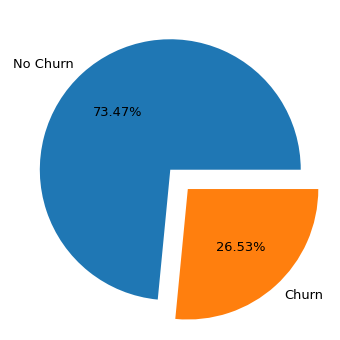

In [200]:
y = telco_train.churn_encoded.value_counts()
plt.pie(y,labels=['No Churn','Churn'] ,explode= [0,0.2], autopct='%.2f%%')
plt.show()

In [201]:
telco_train.head().T

,5911,2479,5889,6087,785
payment_type_id,3.00,1.00,2.00,3.00,4.00
internet_service_type_id,1.00,3.00,1.00,1.00,2.00
contract_type_id,2.00,2.00,1.00,3.00,2.00
senior_citizen,0.00,0.00,0.00,0.00,0.00
tenure,26.00,47.00,1.00,69.00,51.00
monthly_charges,39.95,26.90,50.45,60.05,87.55
total_charges,1023.75,1250.85,50.45,4176.70,4475.90
gender_encoded,1.00,0.00,0.00,1.00,0.00
partner_encoded,0.00,1.00,0.00,0.00,0.00
dependents_encoded,1.00,0.00,0.00,0.00,0.00


### Heatmap showing positive correlation (highest churn) from top to bottom negative correlation (lowest churn)

Text(0.5, 1.0, 'Features Correlating with Churn')

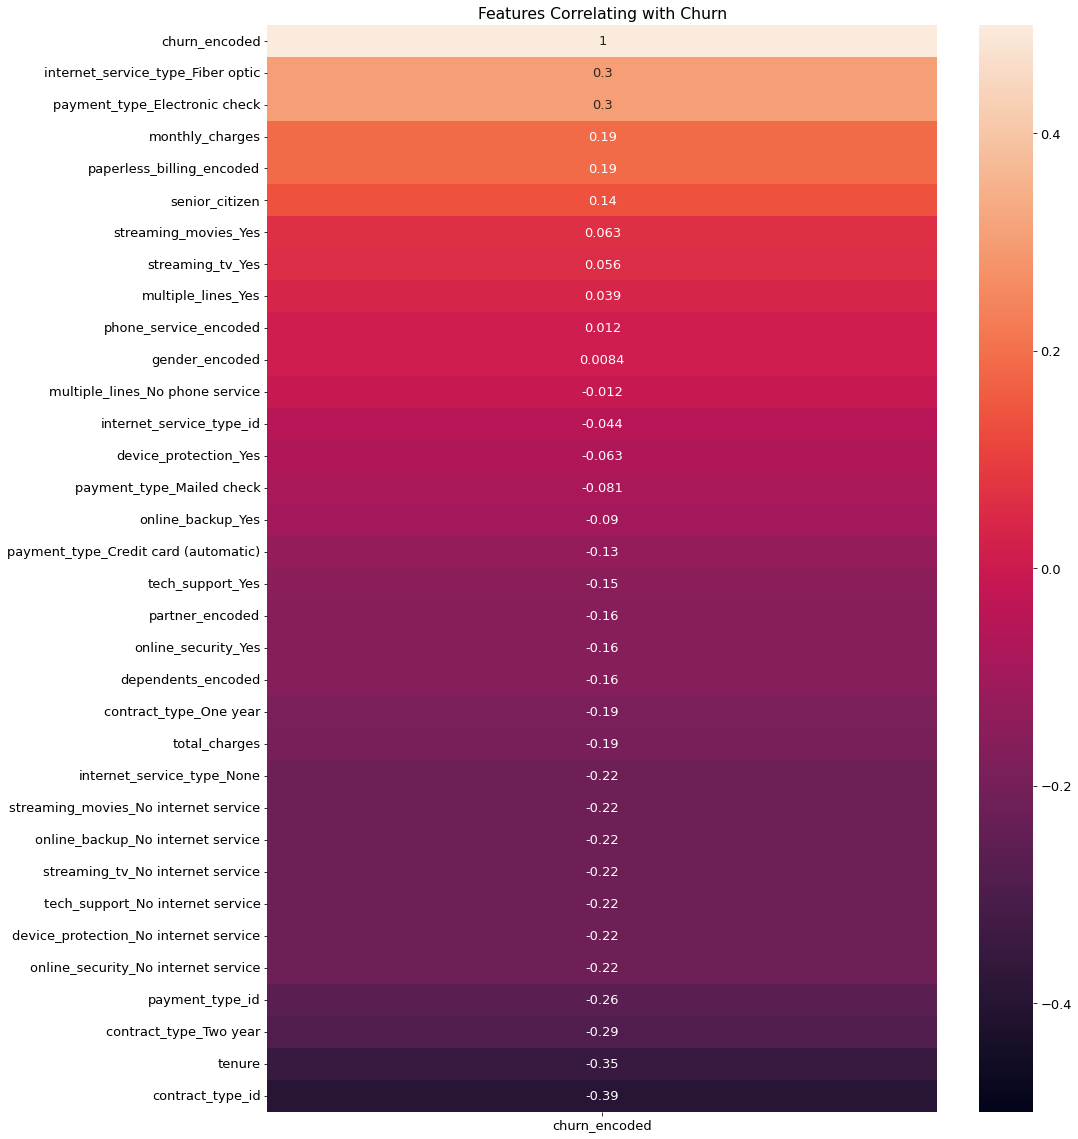

In [202]:
plt.figure(figsize=(15,20))
churn_encoded_heatmap = sns.heatmap(telco_train.corr()[['churn_encoded']].sort_values(by='churn_encoded', ascending=False), vmin=-.5, vmax=.5, annot=True)
churn_encoded_heatmap.set_title('Features Correlating with Churn')

### Hypothesis


### alpha = 0.05
        
### HO: There is no relation between collumn features and churn rate
    (collumn features and churn rate are independent)
    (We fail to reject the H0 that collumn feature and churn rate are dependent)
     
### H⍺: There is a relation between collumn features and churn rate 
    (collumn features and churn are dependent)
    (We reject the H0 that collumn feature and churn rate are independent)

### Statitsical test

### alpha = 0.05
### null_hyp = 'col feature and churn rate are independent'
### alt_hyp = 'col feature and churn rate are dependent'
### observed = pd.crosstab(telco_train.churn_encoded, telco_train.col feature)
### chi2, p, degf, expected = stats.chi2_contingency(observed)
### if p < alpha:
    print('reject the null hypothesis that and posit', alt_hyp)
### else:
    print('fail to reject the null hypothesis and posit', null_hyp)


### Positive correlation
### 1. How does internet_service_type_id correlate to customers churn?

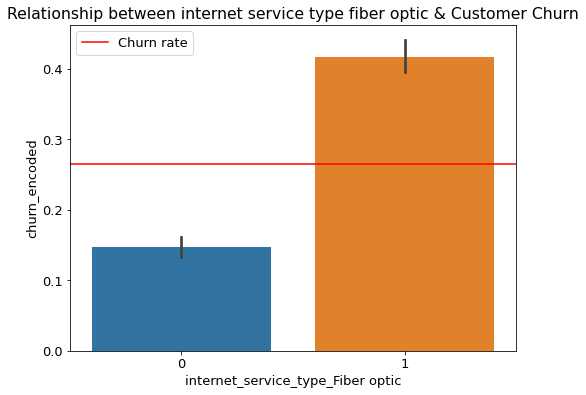

In [203]:
plt.title("Relationship between internet service type fiber optic & Customer Churn")
sns.barplot(x="internet_service_type_Fiber optic", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r",label="Churn rate")
plt.legend()
plt.show()


#### Reject H0 that internet_type_fiber_optic and churn rate are independent
#### There is a relationship between internet_type_fiber_optic and churn rate

### 2. How does payment type Electronic check correlate to customers churn?

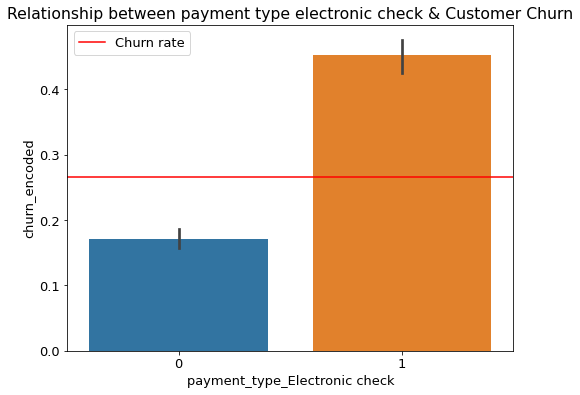

In [205]:
plt.title("Relationship between payment type electronic check & Customer Churn")
sns.barplot(x="payment_type_Electronic check", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the H0 that payment_type_electronic_check and churn rate are independent
#### There is a relationship between payment_type_electronic_check and churn rate

### 3. How does paperless billing encoded correlate to customers churn?

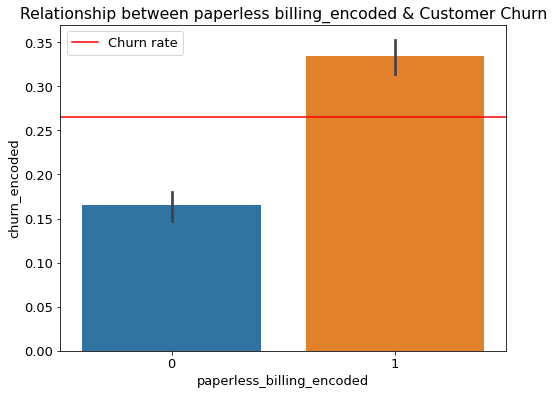

In [207]:
plt.title("Relationship between paperless billing_encoded & Customer Churn")
sns.barplot(x="paperless_billing_encoded", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the H0 that paperless_billing and churn rate are independent
#### There is a relationship between paperless_billing and churn rate


### 4. How does senior citizen correlate to churn?

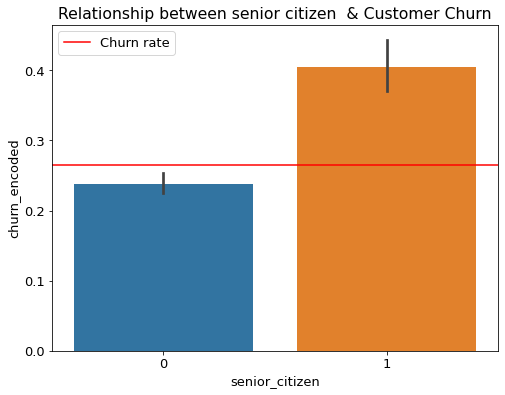

In [209]:
plt.title("Relationship between senior citizen  & Customer Churn")
sns.barplot(x="senior_citizen", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that senior_citizen and churn rate are independent
#### There is a relationship between senior_citizen and churn rate

### 5. How does streaming movies correlate to churn?

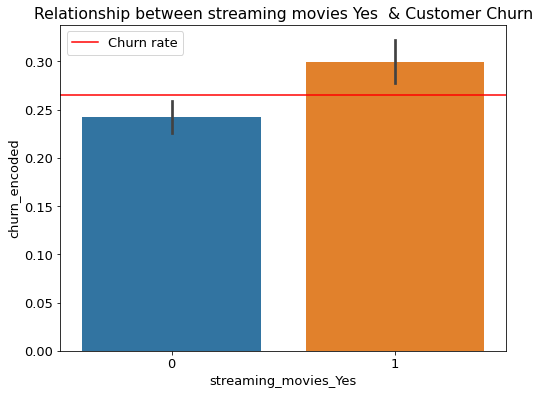

In [211]:
plt.title("Relationship between streaming movies Yes  & Customer Churn")
sns.barplot(x="streaming_movies_Yes", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that streaming_movies_no and churn rate are independent
#### There is a relationship between streaming_movies_no and churn rate

### 6. How does streaming tv correlate to churn?

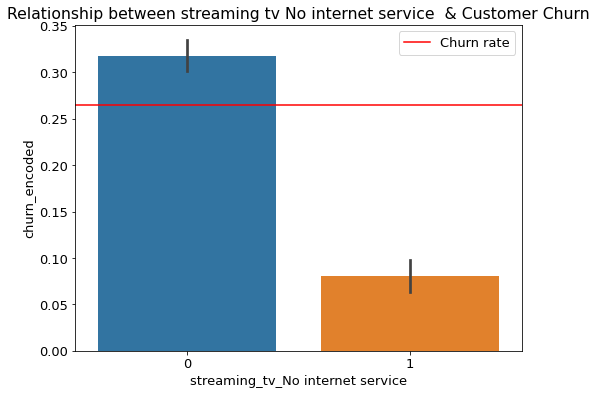

In [213]:
plt.title("Relationship between streaming tv No internet service  & Customer Churn")
sns.barplot(x="streaming_tv_No internet service", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that streaming_tv_no and churn rate are independent
#### There is a relationship between streaming_tv_no and churn rate

### 7. How does multiple lines correlate to churn?

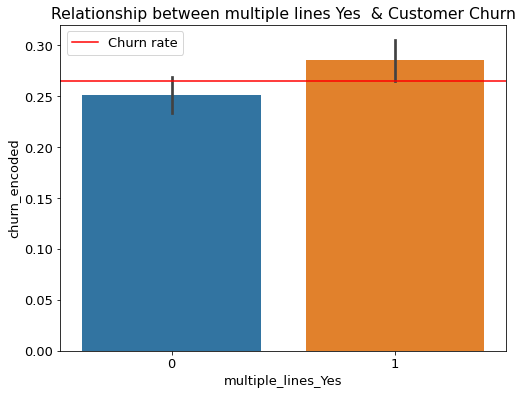

In [215]:
plt.title("Relationship between multiple lines Yes  & Customer Churn")
sns.barplot(x="multiple_lines_Yes", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that multiple_lines_yes and churn rate are independent
#### There is a relationship between multiple_lines_yes and churn rate

### 8. How does gender correlate to churn?

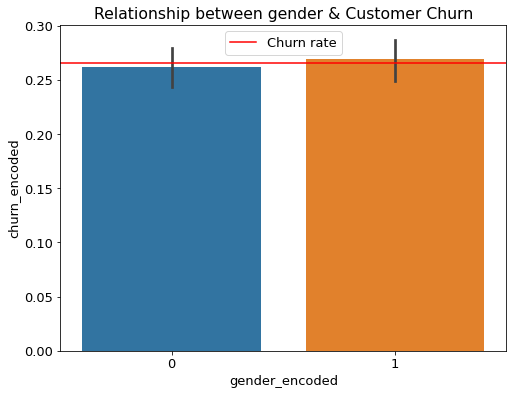

In [217]:
plt.title("Relationship between gender & Customer Churn")
sns.barplot(x="gender_encoded", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### We fail to reject the null hypothesis that gender and churn rate are dependent
#### There is no relationship between gender and churn rate

### Negative Correlation

### 1. How does online security No internet service correlate to churn?

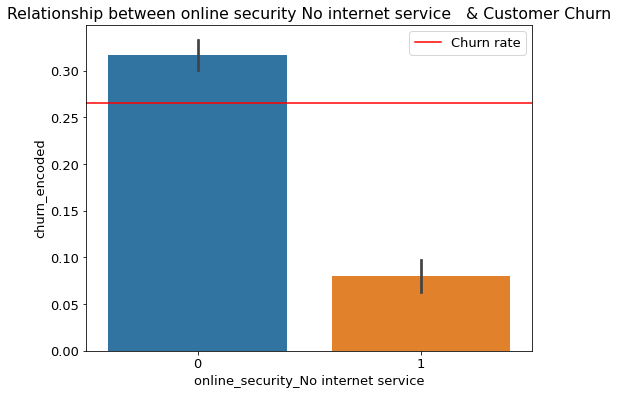

In [219]:
plt.title("Relationship between online security No internet service   & Customer Churn")
sns.barplot(x="online_security_No internet service", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that online_security_No internet service and churn rate are independent
#### There is a relationship between online_security No internet service & churn rate

### 2. How does customers with contract type two year correlate to churn?

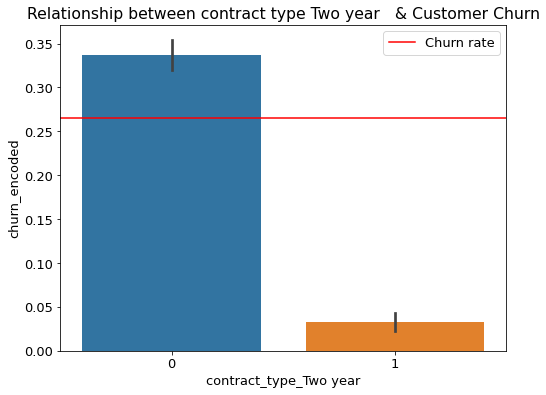

In [221]:
plt.title("Relationship between contract type Two year   & Customer Churn")
sns.barplot(x="contract_type_Two year", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that contract_type_two_year and churn rate are independent
#### There is a relationship between contract_type_two_year churn rate

### 3. How does tenure correlate to customers churning?

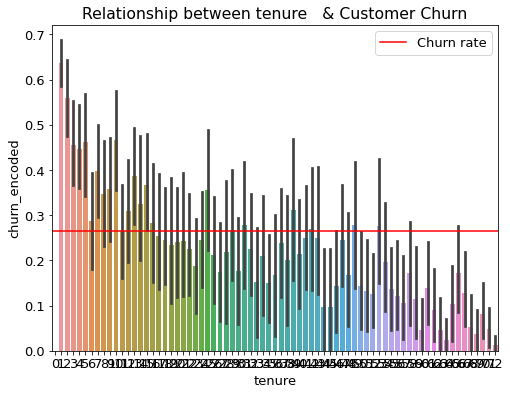

In [223]:
plt.title("Relationship between tenure   & Customer Churn")
sns.barplot(x="tenure", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

### 4. How does contract type id correlate to customers churning?

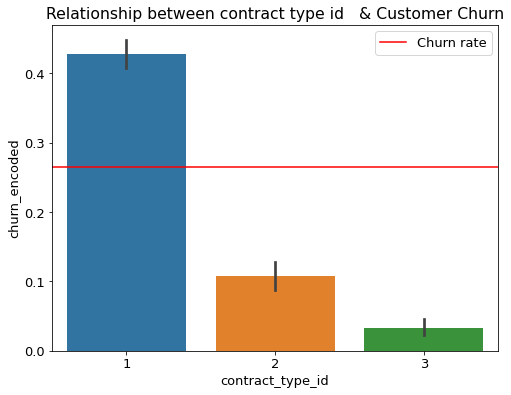

In [224]:
plt.title("Relationship between contract type id   & Customer Churn")
sns.barplot(x="contract_type_id", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that contract type id and churn rate are independent
#### There is a relationship between contract type id churn rate

### 5. How does contract type One year correlate to customers churning?

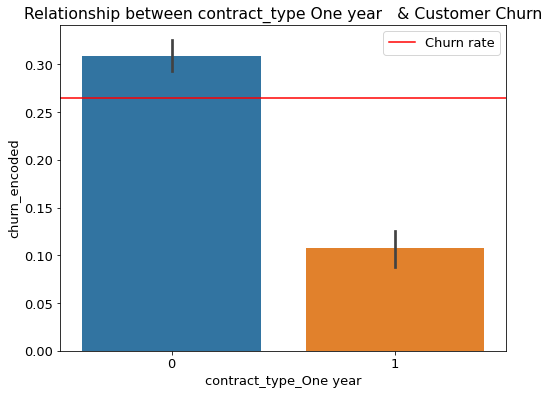

In [226]:
plt.title("Relationship between contract_type One year   & Customer Churn")
sns.barplot(x="contract_type_One year", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

#### Reject the null hypothesis that contract_type_one_year and churn rate are independent
#### There is a relationship between contract_type_one_year churn rate

### 6. How does total_charges to customers churning?

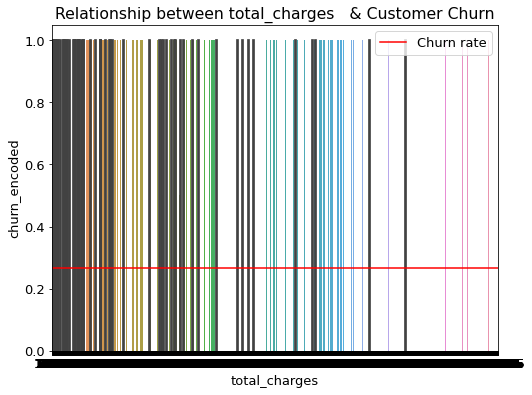

In [228]:
plt.title("Relationship between total_charges   & Customer Churn")
sns.barplot(x="total_charges", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

### Other features
### Finding out if there is a relation between monthly charges  and customers churning

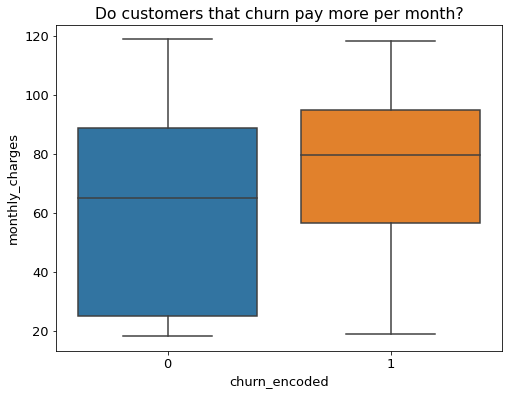

In [104]:
sns.boxplot(data=telco_train, y='monthly_charges', x='churn_encoded')
plt.title('Do customers that churn pay more per month?')
plt.show()


### Takeaway
- The median monthly charges is higher for customers that have churned compared to customers that have not churned.

### Finding out if there is a relation between senior citezen to tenure

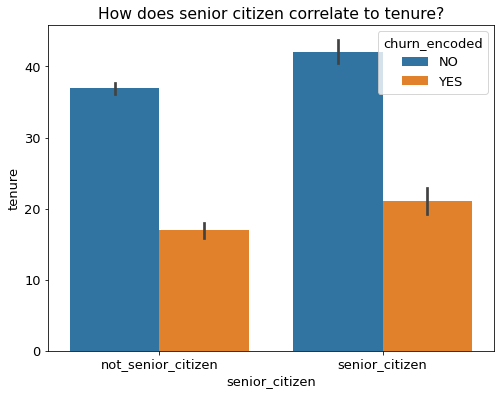

In [105]:
df["senior_citizen"].replace({0:"not_senior_citizen",1:"senior_citizen"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.senior_citizen,y=df.tenure,hue=df.churn_encoded)
plt.title('How does senior citizen correlate to tenure?')
plt.show()

### Takeaway
- Senior citizen churn more than non senior citizens

### Finding out if there is any relation between internet service type id and tenure

In [110]:
temp0 = acquire.get_telco_data()
temp0.columns
temp0['internet_service_type'].value_counts(),temp0['internet_service_type_id'].value_counts()

(Fiber optic    3096
 DSL            2421
 None           1526
 Name: internet_service_type, dtype: int64,
 2    3096
 1    2421
 3    1526
 Name: internet_service_type_id, dtype: int64)

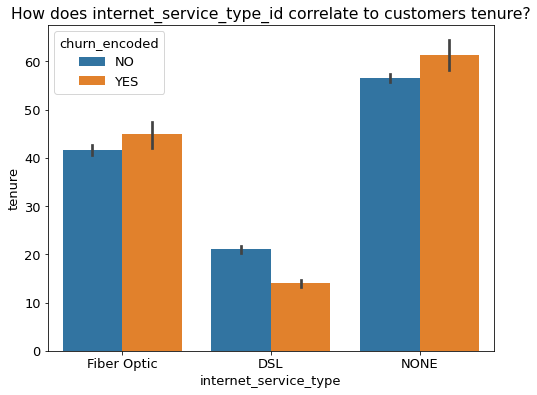

In [111]:

# 1= DSL, 2=Fiber Optic, 3= NONE

df["internet_service_type"] = df.contract_type_id
df["internet_service_type"].replace({3:"NONE",1:"DSL",2:"Fiber Optic"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)

sns.barplot(data=df,  x=df.internet_service_type,y=df.tenure,hue=df.churn_encoded)

df.drop(columns=["internet_service_type"])

plt.title('How does internet_service_type_id correlate to customers tenure?')
plt.show()

### Takeaways
- Customers with no internet service type churn more than those with internet

### Finding out if there is a relation between customers contract type and tenure

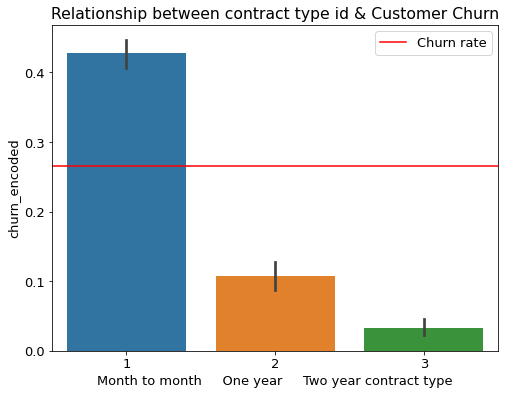

In [233]:
plt.title("Relationship between contract type id & Customer Churn")
sns.barplot(x="contract_type_id", y="churn_encoded", data=telco_train)
churn_encoded_rate = telco_train.churn_encoded.mean()
plt.axhline(churn_encoded_rate, color="r", label = "Churn rate")
plt.xlabel('Month to month     One year     Two year contract type')
plt.legend()
plt.show()

### Takeaway
- Customers with month to month contract churn most than customers with longer contacts

### Finding out a relation between dependents and tenure

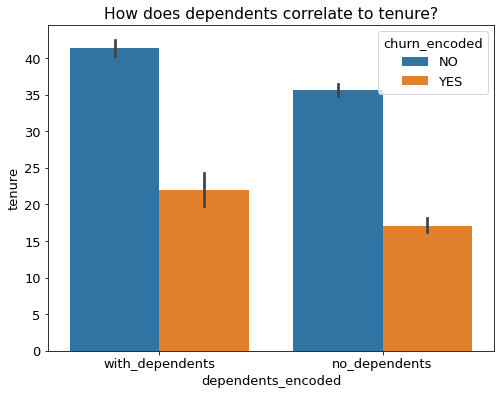

In [116]:
df["dependents_encoded"].replace({0:"no_dependents",1:"with_dependents"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.dependents_encoded,y=df.tenure,hue=df.churn_encoded)
plt.title('How does dependents correlate to tenure?')
plt.show()

### Takeaway
- Customers with dependents have a longer tenure compared to those without dependents

### Finding out if there is a relation between tech support and tenure 

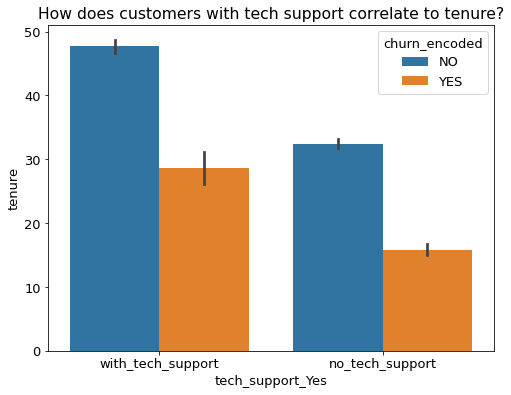

In [117]:
df["tech_support_Yes"].replace({0:"no_tech_support",1:"with_tech_support"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.tech_support_Yes,y=df.tenure,hue=df.churn_encoded)
plt.title('How does customers with tech support correlate to tenure?')
plt.show()

### Takeaway
- Customers with tech support have a longer tenure than customers without.

## Telco Churn Classification Project

## Reduce Customer Churn
<hr style="border-top: 50px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Goals
> - The main goal of this project is identify drivers of customer churn.
> - Build machine learning model that can predict and identify customers that are like to churn.
> - Deliver a report on recommendations for reducing customer churn.

#### Project Description
> - Telco is a leading communications company offering great services to its customers.
> - Customers are churning at a high rate affecting the company's performance.
> - We will therefore identify drivers of customer churn and look at features with highest and low churn rate.
> - We will use machine learning prediction models and demographics and offer recommendations for customer retention.

#### Initial Questions
> - What is the churn rate Telco?
> - What are the features with the highest churn rate?
> - What are the features with the lowest churn rate?
> - What demographic has the highest churn rate?
#### Audience
> - Codeup Data Science students

#### Project Deliverables
> - A final report notebook 
> - A final report notebook presentation
> - All necessary modules to make my project reproducible

#### Project Context
> - The Telco dataset from the Codeup database.



#### Data Dictionary






<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>


### Initial Hypothesis
> - alpha = 0.05
> - HO: There is no relation between collumn features and churn rate
> - (collumn features and churn rate are independent)
> - (We fail to reject the H0 that collumn feature and churn rate are dependent)
> - H⍺: There is a relation between collumn features and churn rate
> - (collumn features and churn are dependent)
> - (We reject the H0 that collumn feature and churn rate are independent)

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

### Conclusions & Next Steps
### Executive Summary 
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

> - With Telco churn rate being at 27%. We identified the main drivers of churn. As per our analysis the main issues were customers with short term contracts, device protection with no internet service, customers with payment type electronic checks.
> - I chose DecisionTree model as my best model1 with a 73% accuracy rate for predicting my target value, churn. When we run the test data, the accuracy for the Decision tree model1 train is maintained at 73%. Therefore, the model has no data overfit compared to other models.

### Recommendations
> - Come up with incentives and promotions to have customers sign up for long term contracts.
> - Provide customers with technical support.
> - Set customer accounts to automatic payments to prevent missed payments.

### Next steps
> - Investigate why customers with Fibre optic churn.
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

### Pipeline Stages Breakdown

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

##### Plan
- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x]  Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Establish a baseline accuracy and document well.
- [x] Train three different classification models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.

___

##### Plan -> Acquire
> - Store functions that are needed to acquire data from the measures and species tables from the iris database on the Codeup data science database server; make sure the acquire.py module contains the necessary imports to run my code.
> - The final function will return a pandas DataFrame.
> - Import the acquire function from the acquire.py module and use it to acquire the data in the Final Report Notebook.
> - Complete some initial data summarization (`.info()`, `.describe()`, `.value_counts()`, ...).
> - Plot distributions of individual variables.
___

##### Plan -> Acquire -> Prepare
> - Store functions needed to prepare the iris data; make sure the module contains the necessary imports to run the code. The final function should do the following:
    - Split the data into train/validate/test.
    - Handle any missing values.
    - Handle erroneous data and/or outliers that need addressing.
    - Encode variables as needed.
    - Create any new features, if made for this project.
> - Import the prepare function from the prepare.py module and use it to prepare the data in the Final Report Notebook.
___

##### Plan -> Acquire -> Prepare -> Explore
> - Answer key questions, my hypotheses, and figure out the features that can be used in a classification model to best predict the target variable, species. 
> - Run at least 2 statistical tests in data exploration. Document my hypotheses, set an alpha before running the tests, and document the findings well.
> - Create visualizations and run statistical tests that work toward discovering variable relationships (independent with independent and independent with dependent). The goal is to identify features that are related to species (the target), identify any data integrity issues, and understand 'how the data works'. If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.
> - Summarize my conclusions, provide clear answers to my specific questions, and summarize any takeaways/action plan from the work above.
___

##### Plan -> Acquire -> Prepare -> Explore -> Model
> - Establish a baseline accuracy to determine if having a model is better than no model and train and compare at least 3 different models. Document these steps well.
> - Train (fit, transform, evaluate) multiple models, varying the algorithm and/or hyperparameters you use.
> - Compare evaluation metrics across all the models you train and select the ones you want to evaluate using your validate dataframe.
> - Feature Selection (after initial iteration through pipeline): Are there any variables that seem to provide limited to no additional information? If so, remove them.
> - Based on the evaluation of the models using the train and validate datasets, choose the best model to try with the test data, once.
> - Test the final model on the out-of-sample data (the testing dataset), summarize the performance, interpret and document the results.
___

##### Plan -> Acquire -> Prepare -> Explore -> Model -> Deliver
> - Introduce myself and my project goals at the very beginning of my notebook walkthrough.
> - Summarize my findings at the beginning like I would for an Executive Summary. (Don't throw everything out that I learned from Storytelling) .
> - Walk Codeup Data Science Team through the analysis I did to answer my questions and that lead to my findings. (Visualize relationships and Document takeaways.) 
> - Clearly call out the questions and answers I am analyzing as well as offer insights and recommendations based on my findings.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

### Reproduce My Project

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

You will need your own env file with database credentials along with all the necessary files listed below to run my final project notebook. 
- [x] Read this README.md
- [ ] Download the aquire.py, prepare.py, and final_report.ipynb files into your working directory
- [ ] Add your own env file to your directory. (user, password, host)
- [ ] Run the final_report.ipynb notebook